# B magnitude at Io footpath

In [25]:
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import B_JRM33 as BJRM
import B_equator as BEQ
import Leadangle_wave as LeadA
from TScmap import TScmap

# Color universal design
cud4 = ['#FF3300', '#FFF100', '#03AF7A', '#005AFF', '#4DC4FF', '#FF8082', '#F6AA00', '#990099', '#804000']
cud4bs = ['#FFCABF', '#FFFF80', '#D8F255', '#BFE4FF', '#FFCA80', '#77D9A8', '#C9ACE6', '#84919E']

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold',
                     })
params = {
    # 'lines.markersize': 1,
    # 'lines.linewidth': 1,
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'xtick.minor.size': 3.5,
    'xtick.major.width': 2.0,
    'xtick.minor.width': 1.25,
    'ytick.major.size': 5,
    'ytick.minor.size': 3,
    'ytick.major.width': 2.0,
    'ytick.minor.width': 1.25,
}
plt.rcParams.update(params)

In [26]:
# 定数
MOON = 'Europa'
MU0 = 1.26E-6            # 真空中の透磁率
AMU = 1.66E-27           # [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
C = 2.99792E+8           # 光速 [m/s]
OMGJ = 1.75868E-4        # 木星の自転角速度 [rad/s]
satovalN = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                         names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])
satovalS = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                         names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

In [27]:
iolat = satovalN['iolat']       # [deg]
iowlon = satovalN['iowlon']     # [deg]
ioS3 = satovalN['wlon']
N = ioS3.size

In [28]:
Babs_arr = np.zeros(N)

for i in range(N):
    lat = iolat[i]
    wlong = iowlon[i]

    theta = math.radians(90-lat)      # Surface [rad]
    phi = math.radians(360-wlong)     # Surface [rad]

    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(math.cos(math.radians(lat))**2 +
                    (math.sin(math.radians(lat))*14.4/15.4)**2)

    Bv = BJRM.B().JRM33(rs, theta, phi)*1E-9*1E+4        # [T]

    Babs = math.sqrt(Bv[0]**2+Bv[1]**2+Bv[2]**2)

    Babs_arr[i] = Babs


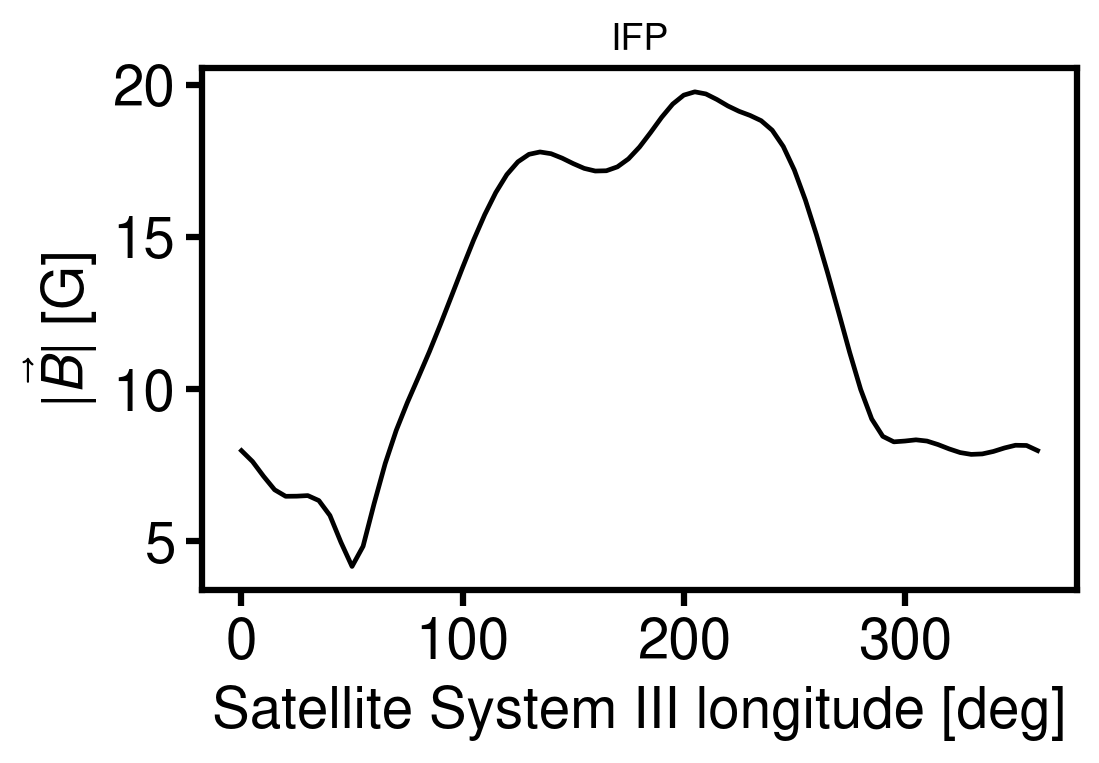

In [29]:
# ====
# PLOT
# ====
fsize = 18
fig, ax = plt.subplots(figsize=(5, 3), dpi=226)
ax.set_title(r'IFP')
ax.tick_params(axis='both', labelsize=fsize)
ax.set_xlabel('Satellite System III longitude [deg]', fontsize=fsize)
ax.set_ylabel(r'$|\vec{B}|$ [G]', fontsize=fsize)
ax.plot(ioS3, Babs_arr, color='k')

# np.savetxt('data/Io_59_JRM33.txt', np.array([np.degrees(S3wlon), B, Br, Btheta, Bphi]))

plt.show()

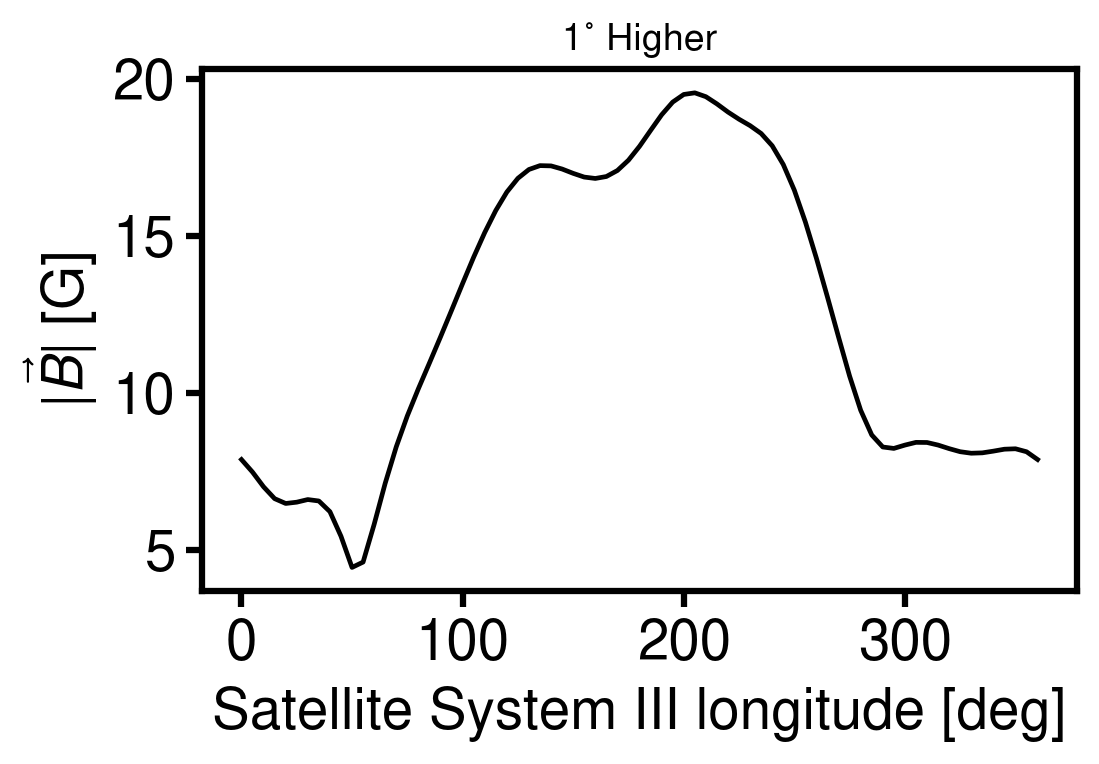

In [30]:
Babs_arr = np.zeros(N)

for i in range(N):
    lat = iolat[i]
    wlong = iowlon[i]

    theta = math.radians(90-1-lat)      # Surface [rad]
    phi = math.radians(360-wlong)     # Surface [rad]

    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(math.cos(math.radians(lat))**2 +
                    (math.sin(math.radians(lat))*14.4/15.4)**2)

    Bv = BJRM.B().JRM33(rs, theta, phi)*1E-9*1E+4        # [T]

    Babs = math.sqrt(Bv[0]**2+Bv[1]**2+Bv[2]**2)

    Babs_arr[i] = Babs

# ====
# PLOT
# ====
fsize = 18
fig, ax = plt.subplots(figsize=(5, 3), dpi=226)
ax.set_title(r'1˚ Higher')
ax.tick_params(axis='both', labelsize=fsize)
ax.set_xlabel('Satellite System III longitude [deg]', fontsize=fsize)
ax.set_ylabel(r'$|\vec{B}|$ [G]', fontsize=fsize)
ax.plot(ioS3, Babs_arr, color='k')

# np.savetxt('data/Io_59_JRM33.txt', np.array([np.degrees(S3wlon), B, Br, Btheta, Bphi]))

plt.show()

ミラー力は？